In [2]:
!pip3 install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [5]:
df = pd.read_csv(r"/content/Churn_Modelling.csv")  # use r to avoid error
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Convert to numeric values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [7]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
x = df[features]
y = df['Exited']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
# Normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
x_train[:5], x_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [41]:
model=RandomForestClassifier(n_estimators=100, random_state=42) #estimator is no. of decision tree to be created
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred=model.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
accuracy= accuracy_score(y_test, y_pred)

In [43]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


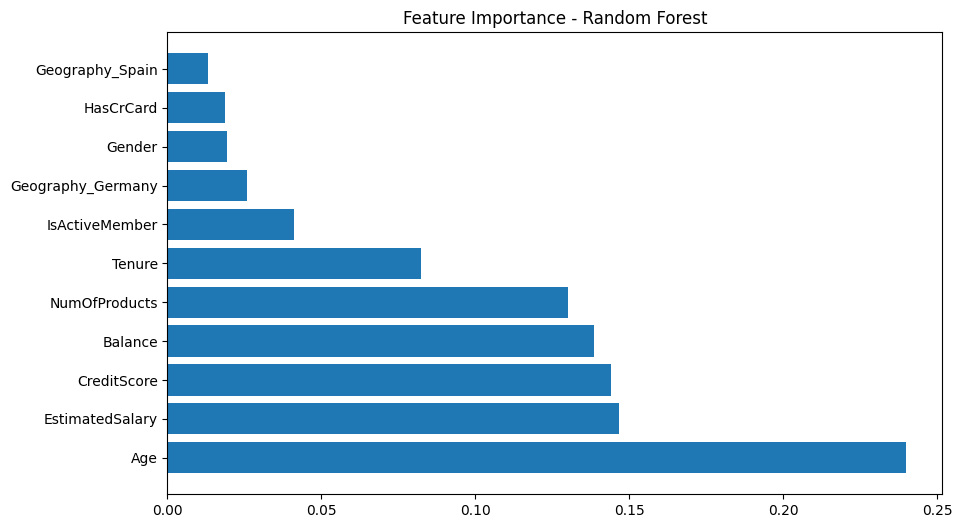

In [14]:
# Feature importance visualization for Random Forest
importances = models['Random Forest'].feature_importances_
indices = np.argsort(importances)[::-1]  # invert the importance array
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.barh(range(x.shape[1]), importances[indices])
plt.yticks(range(x.shape[1]), names)
plt.show()

In [17]:
import plotly.express as px

feature_importances = models['Random Forest'].feature_importances_
feature_names = features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importance - Random Forest')
fig.show()

In [44]:
from sklearn.linear_model import LogisticRegression #for logreg model
#Build and train LG model
log_reg=LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
#make prediction
y_pred_log_reg=log_reg.predict(x_test)
#Evaluate model
conf_matrix_log_reg= confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
accuracy_log_reg=accuracy_score(y_test, y_pred_log_reg)
print(conf_matrix_log_reg, class_report_log_reg,accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


In [10]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}


In [13]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print(f"Accuracy: {accuracy}\n")

Model: Random Forest
Confusion Matrix:
 [[1551   56]
 [ 211  182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.8665

Model: XGBoost
Confusion Matrix:
 [[1526   81]
 [ 191  202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000

Accuracy: 0.864



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:29:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Model: LightGBM
Confusion Matrix:
 [[1533   74]
 [ 190  203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.52      0.61       393

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.868

Model: CatBoost


In [48]:
#for svm model
from sklearn.svm import SVC
from sklearn.metrics import precision_score
#make pred
y_pred_svm= svm_model.predict(x_test)
precision = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
print("Precision:", precision)
#build and train svm
svm_model= SVC(kernel='linear', random_state=42)
svm_model.fit(x_train,y_train)
#evaluate
conf_matrix_svm=confusion_matrix(y_test,y_pred_svm)
class_report_svm=classification_report(y_test, y_pred_svm)
accuracy_svm=accuracy_score(y_test,y_pred_svm)
print(conf_matrix_svm, class_report_svm, accuracy_svm)

Precision: 0.40175
[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [49]:
from sklearn.neighbors import KNeighborsClassifier
#build and train knn model
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
#make prediction
y_pred_knn=knn_model.predict(x_test)
#evaluate
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn=classification_report(y_test, y_pred_knn)
acuuracy_knn=accuracy_score(y_test,y_pred_knn)
print(conf_matrix_knn,class_report_knn,acuuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


In [50]:
#gbm model
from sklearn.ensemble import GradientBoostingClassifier
#build model
gbm_model= GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(x_train,y_train)
#prediction
y_pred_gbm=gbm_model.predict(x_test)
#evaluate
conf_matrix_gbm=confusion_matrix(y_test,y_pred_gbm)
class_report_gbm=classification_report(y_test,y_pred_gbm)
accuracy_gbm=accuracy_score(y_test, y_pred_gbm)
print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


In [46]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),  # I will set probability=True for ROC curve
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier()
}


In [32]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print(f"Accuracy: {accuracy}\n")

Model: Random Forest
Confusion Matrix:
 [[1551   56]
 [ 211  182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.8665

Model: XGBoost
Confusion Matrix:
 [[1526   81]
 [ 191  202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000

Accuracy: 0.864



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[19:55:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Model: LightGBM
Confusion Matrix:
 [[1533   74]
 [ 190  203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.52      0.61       393

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.868

Model: CatBoost


In [34]:
metrics = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to the list
    metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[19:57:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


<Figure size 1200x600 with 0 Axes>

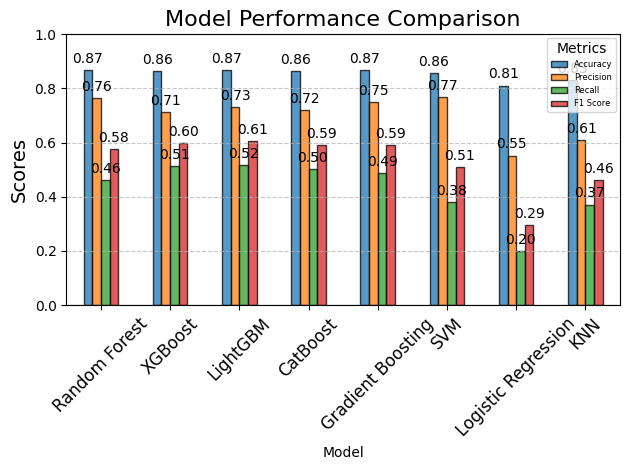

In [39]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Set the model names as the index
metrics_df.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = metrics_df.plot(kind='bar', alpha=0.75, edgecolor='black')

# Adding exact values on top of the bars
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Scores', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', fontsize=6)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

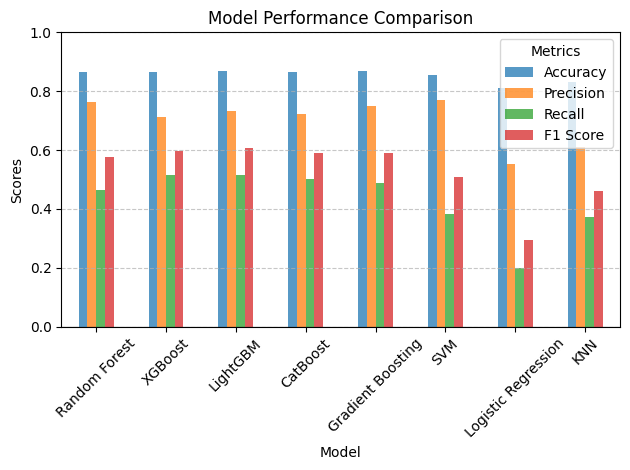

In [31]:
# Plotting
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', alpha=0.75)
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [51]:
#adding feature can improve performance
df = pd.read_csv(r"/content/Churn_Modelling.csv")


In [52]:
df['BalanceZero']= (df['Balance']==0).astype(int)
#age grp
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[18, 25, 35, 45, 55, 65, 75, 85, 95],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
)

#balace to salary ratio
df['BalanceToSalaryRatio']=df['Balance']/df['EstimatedSalary']
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']
#tenure group
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels=['0-2', '3-5', '6-7', '8-10'])

In [53]:
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'BalanceZero',
       'AgeGroup', 'BalanceToSalaryRatio', 'ProductUsage', 'TenureGroup'],
      dtype='object')


In [54]:
# Create dummy variables for Geography
geography_dummies = pd.get_dummies(df['Geography'], prefix='Geography', drop_first=False)

# Add the dummy columns to the DataFrame
df = pd.concat([df, geography_dummies], axis=1)


In [55]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Create interaction terms
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']


In [56]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Male_Germany']= df['Gender'] * df['Geography_Germany']
df['Male_Spain']=df['Gender'] * df['Geography_Spain']

In [57]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
            'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage'] + \
           [col for col in df.columns if 'AgeGroup' in col or 'TenureGroup' in col]
x = df[features]
y = df['Exited']


In [58]:
df=pd.get_dummies(df,columns=['AgeGroup','TenureGroup'],drop_first=True)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test) #to normalise data
model=RandomForestClassifier(n_estimators=100, random_state=42) #estimator is no. of decision tree to be created
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
accuracy= accuracy_score(y_test, y_pred)

ValueError: Cannot cast object dtype to float64

In [61]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665
